In [3]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [4]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

## Prediction ##

In [5]:
galton = Table.read_table('galton.csv')

In [6]:
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [7]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


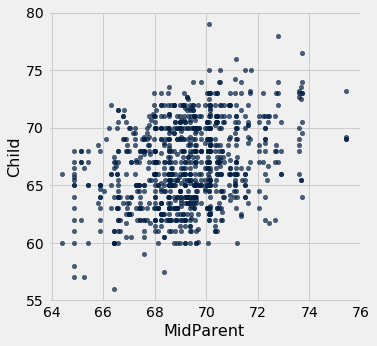

In [8]:
heights.scatter('MidParent')

In [9]:
def predict_child(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(h-0.5, h + 0.5))
    return close_points.column('Child').mean()   

In [10]:
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

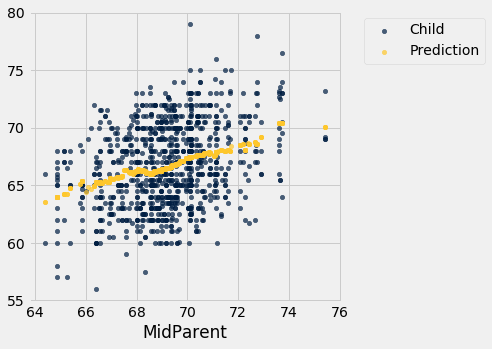

In [11]:
heights_with_predictions.scatter('MidParent')

## Association ##

In [12]:
hybrid = Table.read_table('hybrid.csv')

In [ ]:
hybrid

In [16]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

In [ ]:
Table().with_column(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

In [ ]:
Table().with_column(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

## Correlation ##

In [ ]:
r_scatter(...)

## Calculating $r$ ##

In [ ]:
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

In [ ]:
t.scatter('x', 'y', s=30, color='red')

In [ ]:
t = t.with_column(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

In [ ]:
t = t.with_column('product of standard units', t.column(2) * t.column(3))
t

In [ ]:
# r 

r = ...

r

In [36]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = ...
    y_in_standard_units = ...
    return ...

### Switching Axes ###

In [ ]:
correlation(t, 'x', 'y')

In [ ]:
t.scatter('x', 'y', s=30, color='red')

In [ ]:
t.scatter('y', 'x', s=30, color='red')

In [ ]:
correlation(t, 'y', 'x')

### Nonlinearity ###

In [ ]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [ ]:
correlation(nonlinear, 'x', 'y')

### Outliers ###

In [ ]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [ ]:
correlation(line, 'x', 'y')

In [ ]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [ ]:
correlation(outlier, 'x', 'y')

### Ecological Correlations ###

In [ ]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

In [ ]:
sat2014.scatter('Critical Reading', 'Math')